The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study on 768 adult female Pima Indians living near Phoenix. 
The purpose of the study was to investigate factors related to diabetes. 
The data may be found in the dataset ‘pima.txt’.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn import metrics

data = pd.read_csv('DATA/pima.txt',delimiter="	")
columns = ['pregnant','glucose','diastolic','triceps','insulin','bmi','diabetes','age','test']

### Perform simple graphical and numerical summaries of the data. 
Can you find any obvious irregularities in the data?
If you do, take appropriate steps to correct the problems.

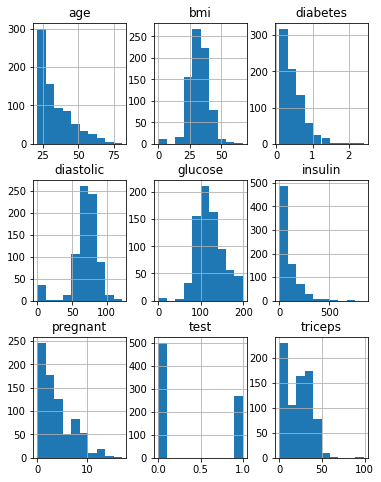

In [23]:
# histogram of the whole data
hist = data.hist(figsize=(6,8))
plt.show()

Some data is missing. 
In the next step restore values with a median value of the whole data 

In [24]:
non_zero_columns = ['glucose','diastolic','triceps','bmi','diabetes','age']

# subst zero values for the mean values
for column in non_zero_columns:
    median = data[column].median()
# Substitute it in the BMI column of the
# dataset where values are 0
    data[column] = data[column].replace(
    to_replace=0, value=median)


print(data.describe())

         pregnant     glucose   diastolic     triceps     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.656250   72.386719   27.334635   79.799479   32.450911   
std      3.369578   30.438286   12.096642    9.229014  115.244002    6.875366   
min      0.000000   44.000000   24.000000    7.000000    0.000000   18.200000   
25%      1.000000   99.750000   64.000000   23.000000    0.000000   27.500000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         diabetes         age        test  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

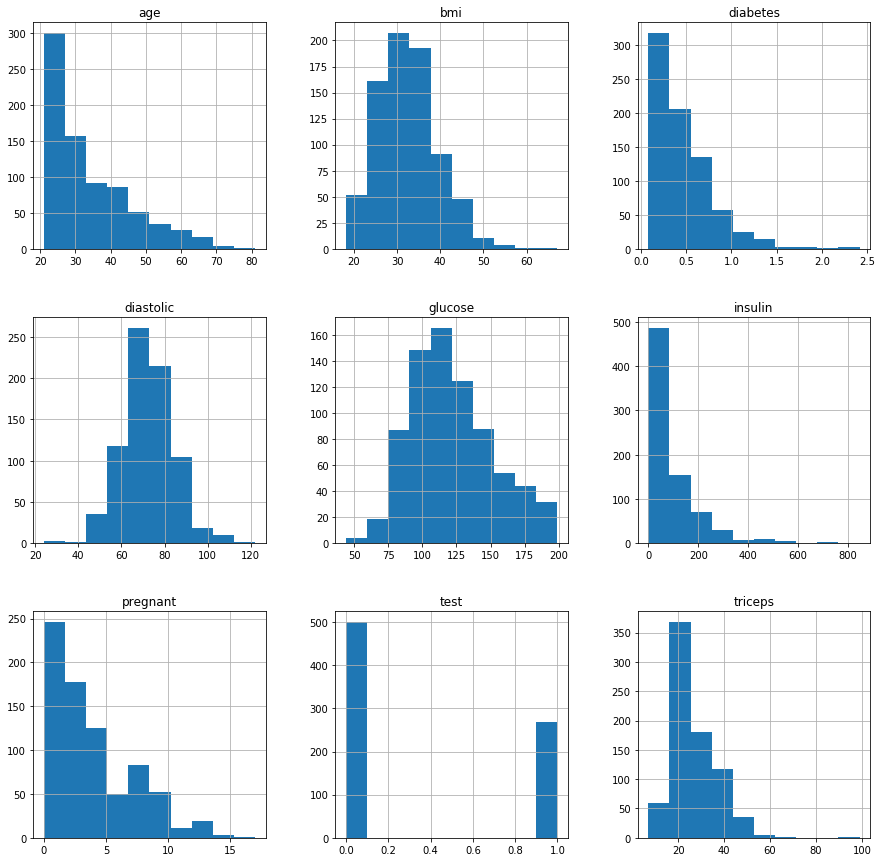

In [25]:
# histogram of the corrected data
hist = data.hist(figsize=(15,15))
plt.show()

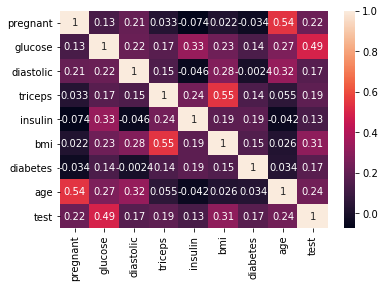

In [26]:
#correlation check
corr = data.corr()
sns.heatmap(corr, annot = True)
plt.show()

### Fit a model with the result of the diabetes test as the response and all the other variables as predictors. 
Can you tell whether this model fits the data?

In [27]:
Y = data["test"].copy()
X = data.drop("test", axis=1)

scaler = Scaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
print("SCALED", X_scaled)

mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

SCALED [[0.35294118 0.67096774 0.48979592 ... 0.31492843 0.23441503 0.48333333]
 [0.05882353 0.26451613 0.42857143 ... 0.17177914 0.11656704 0.16666667]
 [0.47058824 0.89677419 0.40816327 ... 0.10429448 0.25362938 0.18333333]
 ...
 [0.29411765 0.49677419 0.48979592 ... 0.16359918 0.07130658 0.15      ]
 [0.05882353 0.52903226 0.36734694 ... 0.24335378 0.11571307 0.43333333]
 [0.05882353 0.31612903 0.46938776 ... 0.24948875 0.10119556 0.03333333]]
Mean: (3, 121)
Standard deviation: (3, 30)


In [28]:
model = LogisticRegression()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

#Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Consufion matrix: %a Correct predictions %f ' % (cm,(cm[0][0]+cm[1][1])/len(Y_test)*100))

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))


Consufion matrix: array([[86, 13],
       [22, 33]]) Correct predictions 77.272727 
Accuracy: 0.7727272727272727
Precision: 0.717391304347826
Recall: 0.6


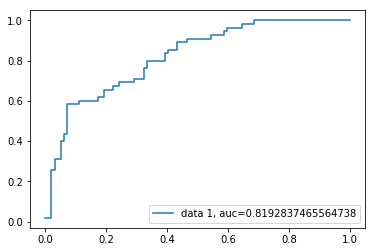

In [29]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


###  What is the difference in the odds of testing positive for diabetes for a woman with a BMI at the first quartile compared with a woman at the third quartile, if all other factors are held constant? 
Give a confidence interval for this difference.


###  Do women who test positive have higher diastolic blood pressures? 
Is the diastolic blood pressure significant in the regression model? 
Explain the distinction between the two questions and discuss why the answers are only apparently contradictory.


### Predict the outcome for a woman with predictor values 
1, 99, 64, 22, 76, 27, 0.25, 25 (same order as in the dataset).
Give a confidence interval for your prediction.


#### For confidence interval estimation: 
(Texts in statistical science) Faraway, Julian James-Extending the linear model with R _ generalized linear, mixed effects and nonparametric regression models-Chapman & Hall_CR (attached)

In [31]:
P = pd.DataFrame([[1, 99, 64, 22, 76, 27, 0.25, 25]])
P_scaled = scaler.transform(P)

P_pred = model.predict(P_scaled)
print(P_pred)

[0]


### Use different regressions (binary choice) models and quantify the quality of predictions with different metrics. 
Which solution is the best?
